In this chapter you will delve into the details of logistic regression. You'll learn all about regularization and how to interpret model output.

# 1- Logistic regression and regularization


video

# 2- Regularized logistic regression


<p>In Chapter 1, you used logistic regression on the handwritten digits data set. Here, we&apos;ll explore the effect of L2 regularization. </p>
<p>The handwritten digits dataset is already loaded, split, and stored in the variables <code>X_train</code>, <code>y_train</code>, <code>X_valid</code>, and <code>y_valid</code>. The variables <code>train_errs</code> and <code>valid_errs</code> are already initialized as empty lists.</p>

In [4]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import datasets
import matplotlib.pyplot as plt

digits = datasets.load_digits()
X_train, X_valid, y_train, y_valid = train_test_split(digits.data, digits.target)

# Apply logistic regression and print scores
lr = LogisticRegression()
lr.fit(X_train, y_train)

C:\Users\MohammedTaysser\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\MohammedTaysser\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

<ul>
<li>Loop over the different values of <code>C_value</code>, creating and fitting a <code>LogisticRegression</code> model each time. </li>
<li>Save the error on the training set and the validation set for each model.</li>
<li>Create a plot of the training and testing error as a function of the regularization parameter, <code>C</code>.</li>
<li>Looking at the plot, what&apos;s the best value of <code>C</code>?</li>
</ul>

C:\Users\MohammedTaysser\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\MohammedTaysser\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\MohammedTaysser\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\MohammedTaysser\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\MohammedTaysser\Anaconda3\lib\site-packages\sklearn\linea

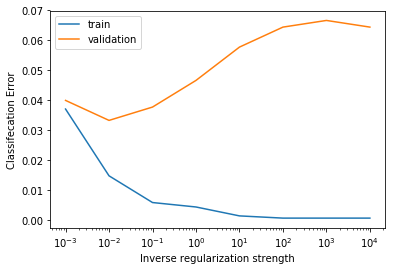

In [12]:
# Train and validaton errors initialized as empty list
train_errs = list()
valid_errs = list()

C_values=[0.001, 0.01, 0.1, 1, 10, 100, 1000, 10000]
for C_value in C_values:
    # Create LogisticRegression object and fit
    lr=LogisticRegression(C=C_value)
    lr.fit(X_train, y_train)
    
    
    # Evaluate error rates and append to lists
    train_errs.append( 1.0 - lr.score(X_train, y_train) )   #Mius 1 To calculate the error
    valid_errs.append( 1.0 - lr.score(X_valid, y_valid) )
    
    
# Plot results
plt.semilogx(C_values, train_errs, C_values, valid_errs)
plt.legend(("train", "validation"))
plt.xlabel('Inverse regularization strength')
plt.ylabel('Classifecation Error')
plt.show()

# 3- Logistic regression and feature selection

<p>In this exercise we&apos;ll perform feature selection on the movie review sentiment data set using L1 regularization. The features and targets are already loaded for you in <code>X_train</code> and <code>y_train</code>.</p>
<p>We&apos;ll search for the best value of <code>C</code> using scikit-learn&apos;s <code>GridSearchCV()</code>, which was covered in the prerequisite course.</p>

<ul>
<li>Instantiate a logistic regression object that uses L1 regularization.</li>
<li>Find the value of <code>C</code> that minimizes cross-validation error.</li>
<li>Print out the number of selected features for this value of <code>C</code>.</li>
</ul>

In [ ]:
# Specify L1 regularization
lr = LogisticRegression(penalty='l1')

# Instantiate the GridSearchCV object and run the search
searcher = GridSearchCV(lr, {'C':[0.001, 0.01, 0.1, 1, 10]})
searcher.fit(X_train, y_train)

# Report the best parameters
print("Best CV params", searcher.best_params_)

# Find the number of nonzero coefficients (selected features)
best_lr = searcher.best_estimator_
print("best_estimator", best_lr)

coefs = best_lr.coef_
print('coefs', coefs)

print("Total number of features:", coefs.size)
print("Number of selected features:", np.count_nonzero(coefs))

# 4- Identifying the most positive and negative words

<p>In this exercise we&apos;ll try to interpret the coefficients of a logistic regression fit on the movie review sentiment dataset. The model object is already instantiated and fit for you in the variable <code>lr</code>.</p>
<p>In addition, the words corresponding to the different features are loaded into the variable <code>vocab</code>. For example, since <code>vocab[100]</code> is &quot;think&quot;, that means feature 100 corresponds to the number of times the word &quot;think&quot; appeared in that movie review.</p>

<ul>
<li>Find the words corresponding to the 5 largest coefficients.</li>
<li>Find the words corresponding to the 5 smallest coefficients.</li>
</ul>

In [ ]:

# Get the indices of the sorted cofficients
inds_ascending = np.argsort(lr.coef_.flatten()) 
inds_descending = inds_ascending[::-1]

# Print the most positive words
print("Most positive words: ", end="")
for i in range(5):
    print(vocab[inds_descending[i]], end=", ")
print("\n")

# Print most negative words
print("Most negative words: ", end="")
for i in range(5):
    print(vocab[inds_ascending[i]], end=", ")
print("\n")

# 5- Logistic regression and probabilities


video

# 6- Getting class probabilities


<p>Which of the following transformations would make sense for transforming the raw model output of a linear classifier into a class probability?</p>
<p><img src="https://s3.amazonaws.com/assets.datacamp.com/production/course_6199/datasets/multiple_choice_proba_transform.png" alt></p>

# 7- Regularization and probabilities


<p>In this exercise, you will observe the effects of changing the regularization strength on the predicted probabilities.</p>
<p>A 2D binary classification dataset is already loaded into the environment as <code>X</code> and <code>y</code>.</p>

In [ ]:
# Set the regularization strength
model = LogisticRegression(C=1)

# Fit and plot
model.fit(X,y)
plot_classifier(X,y,model,proba=True)

# Predict probabilities on training points
prob = model.predict_proba(X)
print("Maximum predicted probability", prob)

In [ ]:
# Set the regularization strength
model = LogisticRegression(C=0.1)

# Fit and plot
model.fit(X,y)
plot_classifier(X,y,model,proba=True)

# Predict probabilities on training points
prob = model.predict_proba(X)
print("Maximum predicted probability", np.max(prob))

# 8- Visualizing easy and difficult examples

<p>In this exercise, you&apos;ll visualize the examples that the logistic regression model is most and least confident about by looking at the largest and smallest predicted probabilities.</p>
<p>The handwritten digits dataset is already loaded into the variables <code>X</code> and <code>y</code>. The <code>show_digit</code> function takes in an integer index and plots the corresponding image, with some extra information displayed above the image.</p>

<ul>
<li>Fill in the first blank with the <em>index</em> of the digit that the model is most confident about.</li>
<li>Fill in the second blank with the <em>index</em> of the digit that the model is least confident about.</li>
<li>Observe the images: do you agree that the first one is less ambiguous than the second?</li>
</ul>

In [ ]:
lr = LogisticRegression()
lr.fit(X,y)

# Get predicted probabilities
proba = lr.predict_proba(X)

# Sort the example indices by their maximum probability
proba_inds = np.argsort(np.max(proba,axis=1))

# Show the most confident (least ambiguous) digit
show_digit(proba_inds[-1], lr)

# Show the least confident (most ambiguous) digit
show_digit(proba_inds[0], lr)

# 9- Multi-class logistic regression


video

# 10- Counting the coefficients


If you fit a logistic regression model on a classification problem with 3 classes and 100 features, how many coefficients would you have, including intercepts?

# 11- Fitting multi-class logistic regression


<p>In this exercise, you&apos;ll fit the two types of multi-class logistic regression, one-vs-rest and softmax/multinomial, on the handwritten digits data set and compare the results. The handwritten digits dataset is already loaded and split into <code>X_train</code>, <code>y_train</code>, <code>X_test</code>, and <code>y_test</code>.</p>

<ul>
<li>Fit a one-vs-rest logistic regression classifier and report the results.</li>
<li>Fit a multinomial logistic regression classifier by setting the <code>multi_class</code> parameter, plus setting to be <code>solver = &quot;lbfgs&quot;</code>, and report the results.</li>
</ul>

In [19]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import datasets

digits = datasets.load_digits()
X_train, X_test, y_train, y_test = train_test_split(digits.data, digits.target)

In [20]:
# Fit one-vs-rest logistic regression classifier
lr_ovr = LogisticRegression()
lr_ovr.fit(X_train, y_train)

print("OVR training accuracy:", lr_ovr.score(X_train, y_train))
print("OVR test accuracy    :", lr_ovr.score(X_test, y_test))

# Fit softmax classifier
lr_mn = LogisticRegression(multi_class='multinomial', solver='lbfgs')
lr_mn.fit(X_train, y_train)

print("Softmax training accuracy:", lr_mn.score(X_train, y_train))
print("Softmax test accuracy    :", lr_mn.score(X_test, y_test))

C:\Users\MohammedTaysser\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\MohammedTaysser\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


OVR training accuracy: 0.9955456570155902
OVR test accuracy    : 0.9644444444444444
Softmax training accuracy: 1.0
Softmax test accuracy    : 0.9666666666666667


C:\Users\MohammedTaysser\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)


# 12- Visualizing multi-class logistic regression

<p>In this exercise we&apos;ll continue with the two types of multi-class logistic regression, but on a toy 2D data set specifically designed to break the one-vs-rest scheme. </p>
<p>The data set is loaded into <code>X_train</code> and <code>y_train</code>. The two logistic regression objects,<code>lr_mn</code> and <code>lr_ovr</code>, are already instantiated (with <code>C=100</code>), fit, and plotted. </p>
<p>Notice that <code>lr_ovr</code> never predicts the dark blue class... yikes! Let&apos;s explore why this happens by plotting one of the binary classifiers that it&apos;s using behind the scenes.</p>

<ul>
<li>Create a new logistic regression object (also with <code>C=100</code>) to be used for binary classification.</li>
<li>Visualize this binary classifier with <code>plot_classifier</code>... does it look reasonable?</li>
</ul>

In [ ]:
# Print training accuracies
print("Softmax training accuracy:", lr_mn.score(X_train, y_train))
print("One-vs-rest training accuracy:", lr_ovr.score(X_train, y_train))

# Create the binary classifier (class 1 vs. rest)
lr_class_1 = LogisticRegression(C=100)
lr_class_1.fit(X_train, y_train==1)

# Plot the binary classifier (class 1 vs. rest)
plot_classifier(X_train, y_train==1, lr_class_1)

# 13- One-vs-rest SVM


<p>As motivation for the next and final chapter on support vector machines, we&apos;ll repeat the previous exercise with a non-linear SVM. Once again, the data is loaded into <code>X_train</code>, <code>y_train</code>, <code>X_test</code>, and <code>y_test</code> .</p>
<p>Instead of using <code>LinearSVC</code>, we&apos;ll now use scikit-learn&apos;s <code>SVC</code> object, which is a non-linear &quot;kernel&quot; SVM (much more on what this means in Chapter 4!). Again, your task is to create a plot of the binary classifier for class 1 vs. rest.</p>

<ul>
<li>Fit an <code>SVC</code> called <code>svm_class_1</code> to predict class 1 vs. other classes. </li>
<li>Plot this classifier.</li>
</ul>

In [ ]:
# We'll use SVC instead of LinearSVC from now on
from sklearn.svm import SVC

# Create/plot the binary classifier (class 1 vs. rest)
svm_class_1 = SVC()
svm_class_1.fit(X_train, y_train==1)
plot_classifier(X_train, y_train==1, svm_class_1)